### Activate the auto-reload

In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Import the libraries

In [20]:
import sys
from pathlib import Path
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

### Set file path to parent directory

In [21]:
sys.path.append(str(Path().resolve().parent / "src"))
os.chdir("../")

### Import the homemade functions

In [22]:
from src.data.data_import import DataImporter

### Get the API keys to access UN data

How-to available at this address: [https://uncomtrade.org/docs/api-subscription-keys/](https://uncomtrade.org/docs/api-subscription-keys/)

In [23]:
UN_API_KEY = "1b9e65d70d9f4e1c8323548618cf877f"

# Import the data

In [24]:
importer = DataImporter(api_key=UN_API_KEY)
df = importer.get_merged_data()
df.head(2)

Reading merged data from: /Users/nakamurahanako/Documents/GitHub/graspp-25S-trade/data/interim/merge.csv


,,Export,Import,ILO
country,year,,,
ABW,2010,124523218.0,1.071034e+09,6.738
AFG,2014,570534007.0,7.697178e+09,1389.950


## Time Series Analysis of Export and Employment of the US

In [25]:
usa_df = df.loc['USA']
print(usa_df.head())

            Export        Import        ILO
year                                       
2003  7.247366e+11  1.302834e+12  30560.423
2004  8.148444e+11  1.525304e+12  30825.738
2005  9.010414e+11  1.734849e+12  31195.043
2006  1.037029e+12  1.918997e+12  31921.004
2007  1.162538e+12  2.017121e+12  31963.932


In [26]:
usa_df = df.loc['USA'].copy()

usa_df = usa_df.reset_index()

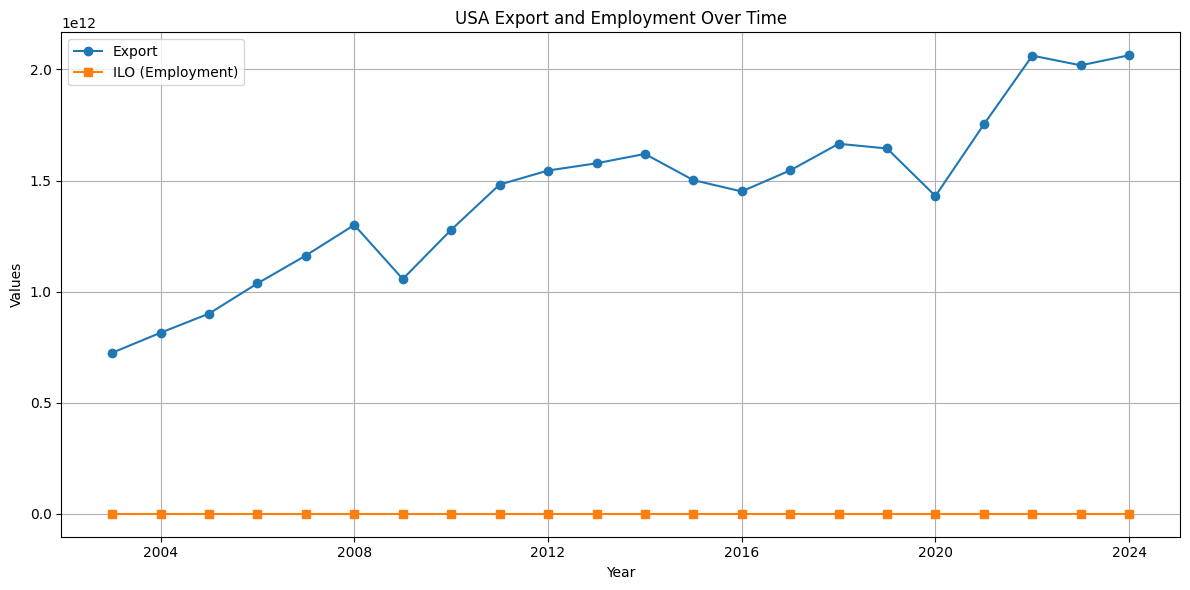

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert year to datetime
usa_df['year'] = pd.to_datetime(usa_df['year'], format='%Y')

# Sort by year
usa_df.sort_values('year', inplace=True)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(usa_df['year'], usa_df['Export'], label='Export', marker='o')
plt.plot(usa_df['year'], usa_df['ILO'], label='ILO (Employment)', marker='s')

plt.title('USA Export and Employment Over Time')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()